# HW5 Jiahao Sun 7438675766

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import random
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from IPython.display import Image

## 1(a)

In [2]:
data_path = "../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv"
raw = pd.read_csv(data_path)

In [3]:
raw

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

In [6]:
rows = len(raw)
random.seed(100)
train_idx = random.sample(range(rows), int(rows * 0.7))
test_idx = [i for i in range(rows) if i not in train_idx]

In [7]:
# split train and test，features and labels
mfcc_train = raw.iloc[train_idx, :]
mfcc_test = raw.iloc[test_idx, :]

train_X = mfcc_train.iloc[:, :-4]
train_Family = mfcc_train.iloc[:, -4]
train_Genus = mfcc_train.iloc[:, -3]
train_Species = mfcc_train.iloc[:, -2]

test_X = mfcc_test.iloc[:, :-4]
test_Family = mfcc_test.iloc[:, -4]
test_Genus = mfcc_test.iloc[:, -3]
test_Species = mfcc_test.iloc[:, -2]

In [8]:
train_X

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
1193       1.0  0.374609  0.134837  0.317741  0.105642  0.075624  0.158739   
3764       1.0  0.543116  0.321120  0.505136  0.157786  0.035803 -0.031532   
3726       1.0  0.428804  0.303557  0.510345  0.091825 -0.058283 -0.108403   
6314       1.0  0.289357  0.324547  0.317657  0.139352  0.186182  0.133602   
1431       1.0  0.187995  0.212623  0.664212  0.249271  0.026984 -0.139997   
...        ...       ...       ...       ...       ...       ...       ...   
7136       1.0 -0.022202  0.418710  0.432025  0.218084  0.056625 -0.109521   
6018       1.0  0.028242  0.339057  0.350101  0.210128  0.224422  0.095344   
4671       1.0  0.087182  0.193457  0.608126  0.258652  0.084562 -0.127633   
1243       1.0  0.397528  0.291275  0.554927  0.114616  0.050531 -0.043843   
4976       1.0  0.010840 -0.072715  0.487299  0.363534  0.091610 -0.054691   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
1193  0.075226 -0.123655 -0.002919  ... -0.161300  0.272122  0.214108   
3764  0.056058  0.217656  0.053408  ...  0.306358 -0.075431 -0.228834   
3726  0.004086  0.230651  0.052366  ...  0.372015 -0.033292 -0.286815   
6314 -0.144870 -0.052710  0.098499  ...  0.143795  0.032504 -0.159278   
1431  0.034140  0.283605  0.083610  ...  0.365840 -0.152332 -0.352353   
...        ...       ...       ...  ...       ...       ...       ...   
7136  0.118611  0.060974 -0.011226  ...  0.037100 -0.038200 -0.042963   
6018 -0.169884 -0.043084  0.066260  ...  0.060234 -0.059725 -0.126764   
4671 -0.014062  0.264356  0.047850  ...  0.219463 -0.284809 -0.181222   
1243  0.079190  0.341584  0.045525  ...  0.340085 -0.141257 -0.272279   
4976 -0.168675 -0.083593  0.323789  ... -0.369239  0.163088  0.307833   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
1193 -0.246365 -0.255364  0.028940  0.022588 -0.004840  0.047002  0.084752  
3764  0.064624  0.172476  0.003541 -0.091615 -0.092753  0.013452  0.156767  
3726  0.031520  0.157522 -0.014210 -0.028362 -0.054420  0.011806  0.181511  
6314 -0.038115  0.111126  0.026116 -0.021868  0.006632 -0.050882 -0.029807  
1431  0.139132  0.304458  0.021255 -0.175797 -0.176280  0.074660  0.271640  
...        ...       ...       ...       ...       ...       ...       ...  
7136  0.049334  0.017761  0.047427  0.015941 -0.033762 -0.029648  0.001478  
6018  0.014029  0.106698  0.037542  0.012528  0.009720 -0.044502 -0.009135  
4671  0.256295  0.207102 -0.128856 -0.207596 -0.086650  0.173079  0.166851  
1243  0.182988  0.251281  0.071694 -0.035420 -0.129997  0.079459  0.218554  
4976  0.053034 -0.108059 -0.122870 -0.066512  0.089446  0.181023  0.019710  

[5036 rows x 22 columns]

## 1(b)

### (i)

### Exact match means every label of a sample must be exactly the same as its in data set. This is a sample-based accuracy. While, for the hamming loss, it is an label-based metric that counts each single miss-matched label rather than consider the lables of a sample as one.

### (ii)

In [10]:
def Param_Grid_Search(classifier, settings, trainX, trainY, testX, testY):
    clf = GridSearchCV(estimator=classifier, **settings)
    clf.fit(trainX, trainY)
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
    # output the best option
    print("\nThe best parameter setting is:")
    print(clf.best_params_, "\n")
    
    # evaluation on single-label task
    test_pred = clf.predict(testX)
    print(classification_report(testY, test_pred))
    return clf

In [11]:
tuned_params = {'C' : np.logspace(1, 4, 4), 
                'gamma' : np.logspace(-3, 6, 10)}

splitter = StratifiedKFold(10, random_state=5036, shuffle=True)

settings = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1}

### Gaussian SVC without standardization

In [13]:
Param_Grid_Search(SVC(kernel='rbf'), settings,train_X, train_Family, test_X, test_Family)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.878 (+/-0.030) for {'C': 10.0, 'gamma': 0.001}
0.928 (+/-0.019) for {'C': 10.0, 'gamma': 0.01}
0.972 (+/-0.016) for {'C': 10.0, 'gamma': 0.1}
0.990 (+/-0.011) for {'C': 10.0, 'gamma': 1.0}
0.985 (+/-0.013) for {'C': 10.0, 'gamma': 10.0}
0.777 (+/-0.033) for {'C': 10.0, 'gamma': 100.0}
0.489 (+/-0.018) for {'C': 10.0, 'gamma': 1000.0}
0.469 (+/-0.006) for {'C': 10.0, 'gamma': 10000.0}
0.466 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.466 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.925 (+/-0.020) for {'C': 100.0, 'gamma': 0.001}
0.942 (+/-0.018) for {'C': 100.0, 'gamma': 0.01}
0.984 (+/-0.012) for {'C': 100.0, 'gamma': 0.1}
0.990 (+/-0.012) for {'C': 100.0, 'gamma': 1.0}
0.985 (+/-0.013) for {'C': 100.0, 'gamma': 10.0}
0.777 (+/-0.033) for {'C': 100.0, 'gamma': 100.0}
0.489 (+/-0.018) for {'C': 100.0, 'gamma': 1000.0}
0.469 (+/-0.006) for {'C': 100.0, 'gamma': 10000.0}
0.466 (+/-0.002) for {'C': 100.0, 'gamma': 100

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             scoring='f1_weighted', verbose=1)

In [14]:
# train with the best params
svc_f = SVC(C=10.0,gamma=1.0) 
svc_f.fit(train_X, train_Family)
pred_family = svc_f.predict(test_X)

In [16]:
Param_Grid_Search(SVC(kernel='rbf'), settings,train_X, train_Genus, test_X, test_Genus)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.773 (+/-0.021) for {'C': 10.0, 'gamma': 0.001}
0.920 (+/-0.016) for {'C': 10.0, 'gamma': 0.01}
0.972 (+/-0.015) for {'C': 10.0, 'gamma': 0.1}
0.990 (+/-0.006) for {'C': 10.0, 'gamma': 1.0}
0.982 (+/-0.008) for {'C': 10.0, 'gamma': 10.0}
0.714 (+/-0.036) for {'C': 10.0, 'gamma': 100.0}
0.440 (+/-0.016) for {'C': 10.0, 'gamma': 1000.0}
0.423 (+/-0.006) for {'C': 10.0, 'gamma': 10000.0}
0.421 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.421 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.919 (+/-0.016) for {'C': 100.0, 'gamma': 0.001}
0.965 (+/-0.019) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.990 (+/-0.006) for {'C': 100.0, 'gamma': 1.0}
0.982 (+/-0.008) for {'C': 100.0, 'gamma': 10.0}
0.714 (+/-0.036) for {'C': 100.0, 'gamma': 100.0}
0.440 (+/-0.016) for {'C': 100.0, 'gamma': 1000.0}
0.423 (+/-0.006) for {'C': 100.0, 'gamma': 10000.0}
0.421 (+/-0.002) for {'C': 100.0, 'gamma': 100

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             scoring='f1_weighted', verbose=1)

In [17]:
# train with the best params
svc_g = SVC(C=10.0,gamma=1.0) 
svc_g.fit(train_X, train_Genus)
pred_genus = svc_g.predict(test_X)

In [18]:
Param_Grid_Search(SVC(kernel='rbf'), settings,train_X, train_Species, test_X, test_Species)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.786 (+/-0.010) for {'C': 10.0, 'gamma': 0.001}
0.934 (+/-0.015) for {'C': 10.0, 'gamma': 0.01}
0.974 (+/-0.013) for {'C': 10.0, 'gamma': 0.1}
0.987 (+/-0.009) for {'C': 10.0, 'gamma': 1.0}
0.976 (+/-0.014) for {'C': 10.0, 'gamma': 10.0}
0.640 (+/-0.029) for {'C': 10.0, 'gamma': 100.0}
0.330 (+/-0.015) for {'C': 10.0, 'gamma': 1000.0}
0.316 (+/-0.005) for {'C': 10.0, 'gamma': 10000.0}
0.313 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.313 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.934 (+/-0.014) for {'C': 100.0, 'gamma': 0.001}
0.972 (+/-0.014) for {'C': 100.0, 'gamma': 0.01}
0.987 (+/-0.012) for {'C': 100.0, 'gamma': 0.1}
0.988 (+/-0.010) for {'C': 100.0, 'gamma': 1.0}
0.976 (+/-0.014) for {'C': 100.0, 'gamma': 10.0}
0.640 (+/-0.029) for {'C': 100.0, 'gamma': 100.0}
0.330 (+/-0.015) for {'C': 100.0, 'gamma': 1000.0}
0.316 (+/-0.005) for {'C': 100.0, 'gamma': 10000.0}
0.313 (+/-0.001) for {'C': 100.0, 'gamma': 100

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             scoring='f1_weighted', verbose=1)

In [19]:
# train with the best params
svc_s = SVC(C=100.0,gamma=1.0) 
svc_s.fit(train_X, train_Species)
pred_species= svc_s.predict(test_X)

In [20]:
#Exact match accuracy and Hamming score
y_test = np.column_stack((test_Family, test_Genus, test_Species))
y_pred = np.column_stack((pred_family, pred_genus, pred_species))

In [35]:
def accuracy_score(y_test, y_pred):
    return np.sum(np.all(np.equal(y_test, y_pred), axis=1)) / y_test.shape[0]

def hamming_loss(y_test, y_pred):
    return 1- np.sum(np.sum(np.equal(y_test, y_pred), axis=1),axis=0) / (y_test.shape[0]*y_test.shape[1])

In [36]:
accuracy_score(y_test, y_pred)

0.9851783232978231

In [38]:
hamming_loss(y_test, y_pred)

0.009726725335803654

### Gaussian SVC with standardization

In [40]:
# standardize data
std_scaler = StandardScaler()
std_train_X = std_scaler.fit_transform(train_X)
std_test_X = std_scaler.fit_transform(test_X)

In [41]:
Param_Grid_Search(SVC(kernel='rbf'), settings,std_train_X, train_Family, std_test_X, test_Family)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.946 (+/-0.019) for {'C': 10.0, 'gamma': 0.001}
0.988 (+/-0.012) for {'C': 10.0, 'gamma': 0.01}
0.990 (+/-0.009) for {'C': 10.0, 'gamma': 0.1}
0.907 (+/-0.036) for {'C': 10.0, 'gamma': 1.0}
0.569 (+/-0.028) for {'C': 10.0, 'gamma': 10.0}
0.470 (+/-0.005) for {'C': 10.0, 'gamma': 100.0}
0.466 (+/-0.002) for {'C': 10.0, 'gamma': 1000.0}
0.466 (+/-0.002) for {'C': 10.0, 'gamma': 10000.0}
0.466 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.466 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.975 (+/-0.015) for {'C': 100.0, 'gamma': 0.001}
0.987 (+/-0.012) for {'C': 100.0, 'gamma': 0.01}
0.990 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.907 (+/-0.036) for {'C': 100.0, 'gamma': 1.0}
0.569 (+/-0.028) for {'C': 100.0, 'gamma': 10.0}
0.470 (+/-0.005) for {'C': 100.0, 'gamma': 100.0}
0.466 (+/-0.002) for {'C': 100.0, 'gamma': 1000.0}
0.466 (+/-0.002) for {'C': 100.0, 'gamma': 10000.0}
0.466 (+/-0.002) for {'C': 100.0, 'gamma': 100

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             scoring='f1_weighted', verbose=1)

In [44]:
# train with the best params
svc_f2 = SVC(C=10.0,gamma=0.1) 
svc_f2.fit(std_train_X, train_Family)
pred_family2 = svc_f2.predict(std_test_X)

In [42]:
Param_Grid_Search(SVC(kernel='rbf'), settings,std_train_X, train_Genus, std_test_X, test_Genus)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.953 (+/-0.020) for {'C': 10.0, 'gamma': 0.001}
0.987 (+/-0.007) for {'C': 10.0, 'gamma': 0.01}
0.987 (+/-0.009) for {'C': 10.0, 'gamma': 0.1}
0.854 (+/-0.037) for {'C': 10.0, 'gamma': 1.0}
0.506 (+/-0.026) for {'C': 10.0, 'gamma': 10.0}
0.424 (+/-0.007) for {'C': 10.0, 'gamma': 100.0}
0.421 (+/-0.002) for {'C': 10.0, 'gamma': 1000.0}
0.421 (+/-0.002) for {'C': 10.0, 'gamma': 10000.0}
0.421 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.421 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.975 (+/-0.016) for {'C': 100.0, 'gamma': 0.001}
0.987 (+/-0.007) for {'C': 100.0, 'gamma': 0.01}
0.987 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.854 (+/-0.037) for {'C': 100.0, 'gamma': 1.0}
0.506 (+/-0.026) for {'C': 100.0, 'gamma': 10.0}
0.424 (+/-0.007) for {'C': 100.0, 'gamma': 100.0}
0.421 (+/-0.002) for {'C': 100.0, 'gamma': 1000.0}
0.421 (+/-0.002) for {'C': 100.0, 'gamma': 10000.0}
0.421 (+/-0.002) for {'C': 100.0, 'gamma': 100

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             scoring='f1_weighted', verbose=1)

In [45]:
# train with the best params
svc_g2 = SVC(C=10.0,gamma=0.01) 
svc_g2.fit(std_train_X, train_Genus)
pred_genus2 = svc_g2.predict(std_test_X)

In [43]:
Param_Grid_Search(SVC(kernel='rbf'), settings,std_train_X, train_Species, std_test_X, test_Species)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.968 (+/-0.017) for {'C': 10.0, 'gamma': 0.001}
0.986 (+/-0.008) for {'C': 10.0, 'gamma': 0.01}
0.985 (+/-0.011) for {'C': 10.0, 'gamma': 0.1}
0.829 (+/-0.025) for {'C': 10.0, 'gamma': 1.0}
0.391 (+/-0.020) for {'C': 10.0, 'gamma': 10.0}
0.317 (+/-0.005) for {'C': 10.0, 'gamma': 100.0}
0.313 (+/-0.001) for {'C': 10.0, 'gamma': 1000.0}
0.313 (+/-0.001) for {'C': 10.0, 'gamma': 10000.0}
0.313 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.313 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.981 (+/-0.015) for {'C': 100.0, 'gamma': 0.001}
0.986 (+/-0.009) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.011) for {'C': 100.0, 'gamma': 0.1}
0.829 (+/-0.025) for {'C': 100.0, 'gamma': 1.0}
0.391 (+/-0.020) for {'C': 100.0, 'gamma': 10.0}
0.317 (+/-0.005) for {'C': 100.0, 'gamma': 100.0}
0.313 (+/-0.001) for {'C': 100.0, 'gamma': 1000.0}
0.313 (+/-0.001) for {'C': 100.0, 'gamma': 10000.0}
0.313 (+/-0.001) for {'C': 100.0, 'gamma': 100

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             scoring='f1_weighted', verbose=1)

In [46]:
# train with the best params
svc_s2 = SVC(C=1000.0,gamma=0.01) 
svc_s2.fit(std_train_X, train_Species)
pred_species2= svc_s2.predict(std_test_X)

In [47]:
#Exact match accuracy and Hamming score
y_test2 = np.column_stack((test_Family, test_Genus, test_Species))
y_pred2 = np.column_stack((pred_family2, pred_genus2, pred_species2))

In [50]:
def accuracy_score(y_test, y_pred):
    return np.sum(np.all(np.equal(y_test, y_pred), axis=1)) / y_test.shape[0]

def hamming_loss(y_test, y_pred):
    return 1- np.sum(np.sum(np.equal(y_test, y_pred), axis=1),axis=0) / (y_test.shape[0]*y_test.shape[1])

In [51]:
accuracy_score(y_test2, y_pred2)

0.9763779527559056

In [52]:
hamming_loss(y_test2, y_pred2)

0.012814574648757127

### (iii)

In [55]:
tuned_params = {'C' : np.logspace(1, 5, 10)}

settings = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1}

In [56]:
Param_Grid_Search(LinearSVC(penalty='l1', dual=False), settings,std_train_X, train_Family, std_test_X, test_Family)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.930 (+/-0.022) for {'C': 10.0}
0.930 (+/-0.022) for {'C': 27.825594022071243}
0.930 (+/-0.022) for {'C': 77.4263682681127}
0.930 (+/-0.022) for {'C': 215.44346900318823}
0.930 (+/-0.022) for {'C': 599.4842503189409}
0.930 (+/-0.022) for {'C': 1668.100537200059}
0.930 (+/-0.022) for {'C': 4641.588833612777}
0.930 (+/-0.022) for {'C': 12915.496650148827}
0.930 (+/-0.022) for {'C': 35938.13663804626}
0.930 (+/-0.022) for {'C': 100000.0}

The best parameter setting is:
{'C': 10.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        22
  Dendrobatidae       0.85      0.93      0.89       142
        Hylidae       0.93      0.90      0.91       663
Leptodactylidae       0.95      0.97      0.96      1332

       accuracy                           0.94      2159
      macro avg       0.68      0.70      0.69      2159
   weighted avg       0.93      0.94      0.93    

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=1)

In [59]:
# train with the best params
svc_f3 = LinearSVC(penalty='l1', dual=False,C=10.0)
svc_f3.fit(std_train_X, train_Family)
pred_family3 = svc_f3.predict(std_test_X)

In [57]:
Param_Grid_Search(LinearSVC(penalty='l1', dual=False), settings,std_train_X, train_Genus, std_test_X, test_Genus)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.948 (+/-0.025) for {'C': 10.0}
0.947 (+/-0.023) for {'C': 27.825594022071243}
0.948 (+/-0.023) for {'C': 77.4263682681127}
0.948 (+/-0.024) for {'C': 215.44346900318823}
0.948 (+/-0.024) for {'C': 599.4842503189409}
0.948 (+/-0.024) for {'C': 1668.100537200059}
0.948 (+/-0.024) for {'C': 4641.588833612777}
0.948 (+/-0.024) for {'C': 12915.496650148827}
0.948 (+/-0.024) for {'C': 35938.13663804626}
0.948 (+/-0.024) for {'C': 100000.0}

The best parameter setting is:
{'C': 215.44346900318823} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1251
     Ameerega       0.91      0.96      0.94       142
Dendropsophus       0.95      0.62      0.75        89
    Hypsiboas       0.94      0.98      0.96       497
Leptodactylus       0.97      0.91      0.94        81
Osteocephalus       0.91      0.62      0.74        34
     Rhinella       1.00      0.59      0.74       

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=1)

In [60]:
# train with the best params
svc_g3 = LinearSVC(penalty='l1', dual=False,C=215.44346900318823)
svc_g3.fit(std_train_X, train_Genus)
pred_genus3 = svc_g3.predict(std_test_X)

In [58]:
Param_Grid_Search(LinearSVC(penalty='l1', dual=False), settings,std_train_X, train_Species, std_test_X, test_Species)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.956 (+/-0.021) for {'C': 10.0}
0.956 (+/-0.021) for {'C': 27.825594022071243}
0.956 (+/-0.021) for {'C': 77.4263682681127}
0.956 (+/-0.021) for {'C': 215.44346900318823}
0.956 (+/-0.021) for {'C': 599.4842503189409}
0.956 (+/-0.021) for {'C': 1668.100537200059}
0.956 (+/-0.021) for {'C': 4641.588833612777}
0.956 (+/-0.021) for {'C': 12915.496650148827}
0.956 (+/-0.021) for {'C': 35938.13663804626}
0.956 (+/-0.021) for {'C': 100000.0}

The best parameter setting is:
{'C': 27.825594022071243} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.91      0.94      0.92       200
AdenomeraHylaedactylus       0.99      1.00      1.00      1051
    Ameeregatrivittata       0.90      0.97      0.93       142
            HylaMinuta       0.94      0.66      0.78        89
  HypsiboasCinerascens       0.94      0.93      0.94       149
     HypsiboasCordobae       0.93      0.98      0.9

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=1)

In [61]:
# train with the best params
svc_s3 = LinearSVC(penalty='l1', dual=False,C=27.825594022071243)
svc_s3.fit(std_train_X, train_Species)
pred_species3 = svc_s3.predict(std_test_X)

In [62]:
#Exact match accuracy and Hamming score
y_test3 = np.column_stack((test_Family, test_Genus, test_Species))
y_pred3 = np.column_stack((pred_family3, pred_genus3, pred_species3))

In [63]:
def accuracy_score(y_test, y_pred):
    return np.sum(np.all(np.equal(y_test, y_pred), axis=1)) / y_test.shape[0]

def hamming_loss(y_test, y_pred):
    return 1- np.sum(np.sum(np.equal(y_test, y_pred), axis=1),axis=0) / (y_test.shape[0]*y_test.shape[1])

In [65]:
accuracy_score(y_test3, y_pred3)

0.9198703103288559

In [66]:
hamming_loss(y_test3, y_pred3)

0.04955998147290408

### (iv)

In [70]:
# preform gridsearch with SMOTEin training, apply SMOTE to train data rather than both train and validation set
# refer to https://stackoverflow.com/questions/50245684/using-smote-with-gridsearchcv-in-scikit-learn/50245954?noredirect=1#comment103819811_50245954
def Smote_Param_Grid_Search(classifier, settings, trainX, trainY, testX, testY):
    origin_models = Pipeline([('sampling', SMOTE(random_state=100)), ('classification', classifier)])
    selected_model = Param_Grid_Search(origin_models, settings,trainX, trainY, testX, testY)
    return selected_model

tuned_params = {'classification__C' : np.logspace(1, 5, 10)}

settings = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1}

In [71]:
Smote_Param_Grid_Search(LinearSVC(penalty='l1', dual=False), settings,std_train_X, train_Family, std_test_X, test_Family)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.929 (+/-0.019) for {'classification__C': 10.0}
0.930 (+/-0.020) for {'classification__C': 27.825594022071243}
0.930 (+/-0.020) for {'classification__C': 77.4263682681127}
0.930 (+/-0.020) for {'classification__C': 215.44346900318823}
0.930 (+/-0.020) for {'classification__C': 599.4842503189409}
0.930 (+/-0.020) for {'classification__C': 1668.100537200059}
0.930 (+/-0.020) for {'classification__C': 4641.588833612777}
0.930 (+/-0.020) for {'classification__C': 12915.496650148827}
0.930 (+/-0.020) for {'classification__C': 35938.13663804626}
0.930 (+/-0.020) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 599.4842503189409} 

                 precision    recall  f1-score   support

      Bufonidae       0.32      0.77      0.45        22
  Dendrobatidae       0.69      0.96      0.81       142
        Hylidae       0.94      0.87      0.90       663
Leptodactylidae       0.96      0

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE(random_state=100)),
                                       ('classification',
                                        LinearSVC(dual=False, penalty='l1'))]),
             param_grid={'classification__C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=1)

In [74]:
#apply SMOTE to whole train data and use the best param
smote = SMOTE(random_state=100)
smote_train_X, smote_train_Family = smote.fit_resample(std_train_X, train_Family)
svc_f4 = LinearSVC(penalty='l1', dual=False,C=599.4842503189409)
svc_f4.fit(smote_train_X, smote_train_Family)
pred_family4 = svc_f4.predict(std_test_X)

In [72]:
Smote_Param_Grid_Search(LinearSVC(penalty='l1', dual=False), settings,std_train_X, train_Genus, std_test_X, test_Genus)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.921 (+/-0.020) for {'classification__C': 10.0}
0.921 (+/-0.020) for {'classification__C': 27.825594022071243}
0.921 (+/-0.020) for {'classification__C': 77.4263682681127}
0.921 (+/-0.020) for {'classification__C': 215.44346900318823}
0.921 (+/-0.020) for {'classification__C': 599.4842503189409}
0.921 (+/-0.020) for {'classification__C': 1668.100537200059}
0.921 (+/-0.020) for {'classification__C': 4641.588833612777}
0.921 (+/-0.020) for {'classification__C': 12915.496650148827}
0.921 (+/-0.020) for {'classification__C': 35938.13663804626}
0.921 (+/-0.020) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 10.0} 

               precision    recall  f1-score   support

    Adenomera       0.98      0.91      0.95      1251
     Ameerega       0.75      0.96      0.84       142
Dendropsophus       0.62      0.82      0.71        89
    Hypsiboas       0.96      0.93      0.95       497

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE(random_state=100)),
                                       ('classification',
                                        LinearSVC(dual=False, penalty='l1'))]),
             param_grid={'classification__C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=1)

In [75]:
#apply SMOTE to whole train data and use the best param
smote = SMOTE(random_state=100)
smote_train_X, smote_train_Genus = smote.fit_resample(std_train_X, train_Genus)
svc_g4 = LinearSVC(penalty='l1', dual=False,C=10.0)
svc_g4.fit(smote_train_X, smote_train_Genus)
pred_genus4 = svc_g4.predict(std_test_X)

In [73]:
Smote_Param_Grid_Search(LinearSVC(penalty='l1', dual=False), settings,std_train_X, train_Species, std_test_X, test_Species)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.955 (+/-0.014) for {'classification__C': 10.0}
0.955 (+/-0.015) for {'classification__C': 27.825594022071243}
0.955 (+/-0.015) for {'classification__C': 77.4263682681127}
0.955 (+/-0.015) for {'classification__C': 215.44346900318823}
0.955 (+/-0.015) for {'classification__C': 599.4842503189409}
0.955 (+/-0.015) for {'classification__C': 1668.100537200059}
0.955 (+/-0.015) for {'classification__C': 4641.588833612777}
0.955 (+/-0.015) for {'classification__C': 12915.496650148827}
0.955 (+/-0.015) for {'classification__C': 35938.13663804626}
0.955 (+/-0.015) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 10.0} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.95      0.93      0.94       200
AdenomeraHylaedactylus       1.00      0.99      0.99      1051
    Ameeregatrivittata       0.89      0.94      0.92       142
            HylaMi

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE(random_state=100)),
                                       ('classification',
                                        LinearSVC(dual=False, penalty='l1'))]),
             param_grid={'classification__C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             scoring='f1_weighted', verbose=1)

In [76]:
#apply SMOTE to whole train data and use the best param
smote = SMOTE(random_state=100)
smote_train_X, smote_train_Species = smote.fit_resample(std_train_X, train_Species)
svc_s4 = LinearSVC(penalty='l1', dual=False,C=10.0)
svc_s4.fit(smote_train_X, smote_train_Species)
pred_species4 = svc_s4.predict(std_test_X)

In [77]:
#Exact match accuracy and Hamming score
y_test4 = np.column_stack((test_Family, test_Genus, test_Species))
y_pred4 = np.column_stack((pred_family4, pred_genus4, pred_species4))
def accuracy_score(y_test, y_pred):
    return np.sum(np.all(np.equal(y_test, y_pred), axis=1)) / y_test.shape[0]

def hamming_loss(y_test, y_pred):
    return 1- np.sum(np.sum(np.equal(y_test, y_pred), axis=1),axis=0) / (y_test.shape[0]*y_test.shape[1])

In [78]:
accuracy_score(y_test4, y_pred4)

0.8642890226956924

In [79]:
hamming_loss(y_test4, y_pred4)

0.07086614173228345

## 2

### do one simulation first and then the whole loop

In [4]:
X = raw.iloc[:, :22]
y = raw.iloc[:, 22:25]
score = []
for n in range(2, 51):  # silhouette score is not defined for 1 cluster 
    clusterer = KMeans(n_clusters=n,random_state=200)
    cluster_label = clusterer.fit_predict(X)
    score.append(silhouette_score(X, cluster_label))

### (a)

In [5]:
#### 2(a) find best K
score = np.array(score)
best_k = np.where(score==max(score))[0][0] + 2
clusterer = KMeans(n_clusters=best_k, random_state=200)
cluster_label= clusterer.fit_predict(X)
print("\nThe optimal K is: {}".format(best_k))


The optimal K is: 4


### (b)

In [6]:
#### 2(b) Get the majority class for each clusters
cluster_major = pd.DataFrame(columns=y.columns)
for c in range(best_k):
    idx, = np.where(cluster_label == c)
    cluster_samples = y.iloc[idx, :]
    row = []
    for label in y.columns:
        # get the value counts of a type of label and get the first which is the most
        cur_major = cluster_samples.loc[:, label].value_counts().index[0]
        row.append(cur_major)
    cluster_major.loc[c] = row

In [7]:
print(cluster_major)

            Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas       HypsiboasCordobae
3          Hylidae  Hypsiboas    HypsiboasCinerascens


### (c)

In [8]:
#### 2(c) compute Hamming distance, Hamming score, and Hamming loss
missclf_labels = 0
# for each (1, 3) vector, compare it with cluster major
for c in range(len(cluster_major)):
    idx, = np.where(cluster_label == c)
    for label in y.loc[idx].values:
        miss = (label != cluster_major.loc[c].values)
        missclf_labels += np.sum(miss)
# note that the hamming distance should be get average ove samples rather than labels
hamming_dist = missclf_labels / y.shape[0]
hamming_loss = missclf_labels / (y.shape[0] * y.shape[1])
hamming_score = 1- hamming_loss

In [9]:
print("Hamming Distance: {}, Hamming Loss: {}, Hamming Score: {}".format(hamming_dist, hamming_loss,hamming_score))

Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533


In [10]:
##### 50 times Monte-Carlo Simulation ###########
hamming_dist_lst = []
hamming_loss_lst = []
hamming_score_lst = []
for i in range(50):
    print("Simulation {}:".format(i+1))
    score = []
    for n in range(2, 51):  # silhouette score is not defined for 1 cluster 
        clusterer = KMeans(n_clusters=n,random_state=i)
        cluster_label = clusterer.fit_predict(X)
        score.append(silhouette_score(X, cluster_label))
    #### 2(a) find best K
    score = np.array(score)
    best_k = np.where(score==max(score))[0][0] + 2
    clusterer = KMeans(n_clusters=best_k, random_state=i)
    cluster_label= clusterer.fit_predict(X)
    print("\nThe optimal K is: {}".format(best_k))
    
    #### 2(b) Get the majority class for each clusters
    cluster_major = pd.DataFrame(columns=y.columns)
    for c in range(best_k):
        idx, = np.where(cluster_label == c)
        cluster_samples = y.iloc[idx, :]
        row = []
        for label in y.columns:
            # get the value counts of a type of label and get the first which is the most
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    print("\n")
    print(cluster_major)
    
    #### 2(c) compute Hamming distance, Hamming score, and Hamming loss
    missclf_labels = 0
    # for each (1, 3) vector, compare it with cluster major
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_label == c)
        for label in y.loc[idx].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    # note that the hamming distance should be get average ove samples rather than labels
    hamming_dist = missclf_labels / y.shape[0]
    hamming_loss = missclf_labels / (y.shape[0] * y.shape[1])
    hamming_score = 1- hamming_loss
    print("\nHamming Distance: {}, Hamming Loss: {}, Hamming Score: {}".format(hamming_dist, hamming_loss,hamming_score))
    hamming_dist_lst.append(hamming_dist)
    hamming_loss_lst.append(hamming_loss)
    hamming_score_lst.append(hamming_score)
    print("\n-----------------------------------------------------------------------------------------------------------------------------")
    print("\n")

Simulation 1:

The optimal K is: 4


            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3          Hylidae  Hypsiboas       HypsiboasCordobae

Hamming Distance: 0.6653231410701876, Hamming Loss: 0.22177438035672922, Hamming Score: 0.7782256196432707

-----------------------------------------------------------------------------------------------------------------------------


Simulation 2:

The optimal K is: 4


            Family      Genus                 Species
0          Hylidae  Hypsiboas    HypsiboasCinerascens
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas       HypsiboasCordobae

Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533

-------------------------------------------


Hamming Distance: 0.6674079221681724, Hamming Loss: 0.22246930738939077, Hamming Score: 0.7775306926106093

-----------------------------------------------------------------------------------------------------------------------------


Simulation 17:

The optimal K is: 4


            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1          Hylidae  Hypsiboas    HypsiboasCinerascens
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3    Dendrobatidae   Ameerega      Ameeregatrivittata

Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533

-----------------------------------------------------------------------------------------------------------------------------


Simulation 18:

The optimal K is: 4


            Family      Genus                 Species
0          Hylidae  Hypsiboas    HypsiboasCinerascens
1          Hylidae  Hypsiboas       HypsiboasCordobae
2  Leptodactylidae  A


The optimal K is: 4


            Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3          Hylidae  Hypsiboas       HypsiboasCordobae

Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533

-----------------------------------------------------------------------------------------------------------------------------


Simulation 33:

The optimal K is: 4


            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata

Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533

-----------------------------------------------------------


Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533

-----------------------------------------------------------------------------------------------------------------------------


Simulation 48:

The optimal K is: 4


            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata

Hamming Distance: 0.66726893676164, Hamming Loss: 0.2224229789205467, Hamming Score: 0.7775770210794533

-----------------------------------------------------------------------------------------------------------------------------


Simulation 49:

The optimal K is: 4


            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hyps

In [13]:
hamming_dist_array, hamming_loss_array,hamming_score_array = np.array(hamming_dist_lst), np.array(hamming_loss_lst),np.array(hamming_score_lst)

In [14]:
print("The average Hamming Distance is {}".format(np.mean(hamming_dist_array)))
print("The standard deviation of Hamming Distance is {}".format(np.std(hamming_dist_array)))
print("The average Hamming Loss is {}".format(np.mean(hamming_loss_array)))
print("The standard deviation of Hamming Loss is {}".format(np.std(hamming_loss_array)))
print("The average Hamming Score is {}".format(np.mean(hamming_score_array)))
print("The standard deviation of Hamming Score is {}".format(np.std(hamming_score_array)))

The average Hamming Distance is 0.6711688672689367
The standard deviation of Hamming Distance is 0.031019642340807944
The average Hamming Loss is 0.22372295575631226
The standard deviation of Hamming Loss is 0.010339880780269312
The average Hamming Score is 0.7762770442436876
The standard deviation of Hamming Score is 0.01033988078026931


## ISLR 12.6.2

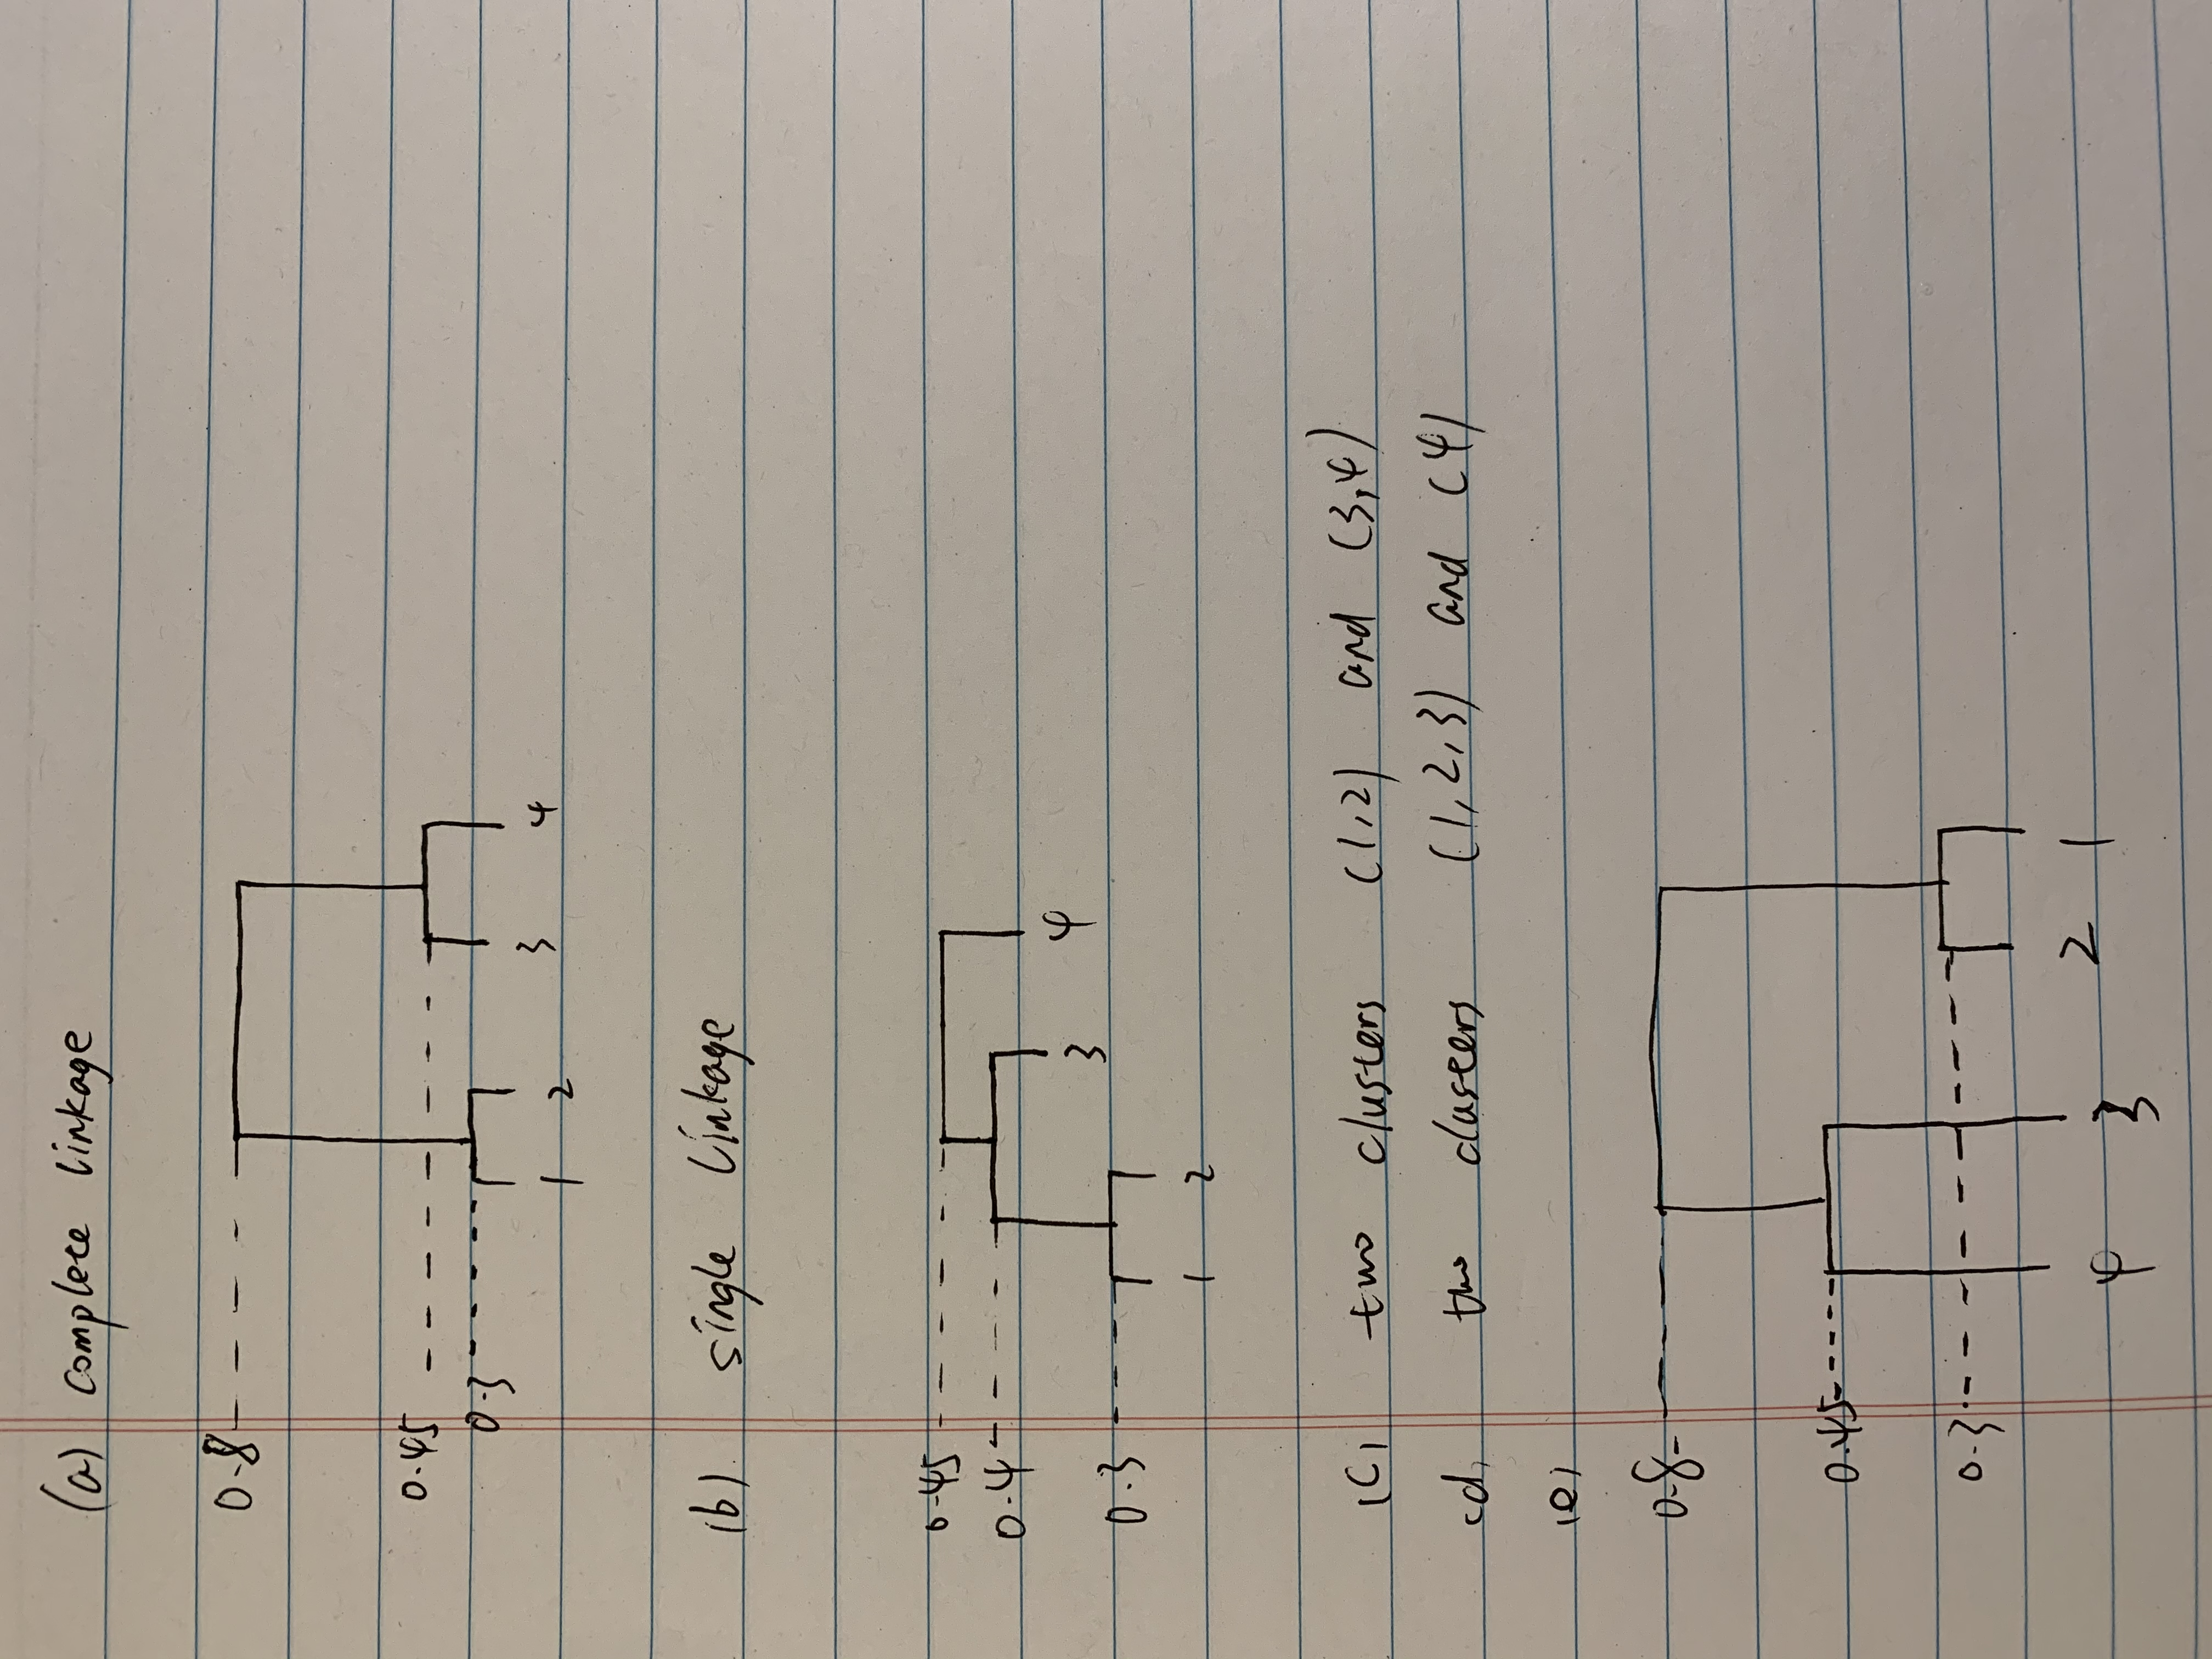

In [120]:
Image('12.6.2.jpg')